# OSA-CASE STUDY

### ETL process

We import the libraries we are going to need to do the ETL process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

We import the excel file containing the data to be processed.

In [2]:
data=pd.read_excel("../DATA/Info_BDApnea_QuironMalaga.xlsx", sheet_name='Hoja1')

In [3]:
data.head(10)

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,...,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP
0,P0001,es el Patient0002 (fotos) 3 (sentado) y 4 (tum...,si,si,16,hombre,NaN,71.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P0002,Es el Patient0006 (sentado) y 7 (tumbado),si,si,16,hombre,NaN,29.6,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P0003,"Patient 8, 9 y 10",si,si,16,hombre,NaN,56.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0004,Patient 13 y 14,si_codigos,si,16,hombre,NaN,19.7,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P0005,Patient0015 los códigos QMH5,si_codigos,si,16,hombre,NaN,9.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,P0006,QMH6,si_codigos,si,16,hombre,NaN,2.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,P0007,QMH7,si_codigos,si,16,hombre,NaN,34.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,P0008,QMH8,si_codigos,si,16,hombre,NaN,60.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,P0009,QMH9,si_codigos,si,16,hombre,NaN,22.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,P0010,QMH10,si_codigos,si,16,hombre,NaN,11.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We look at what columns exist and then we look at their non-nulls and their types.

In [4]:
data.columns

Index(['Patient', 'Comentarios', 'Audios tumbado', 'Fotos', 'Audio fs KHz',
       'Gender', 'EPWORTH', 'IAH', 'IAH Supino', 'IAH Lateral', 'Peso',
       'Talla', 'IMC', 'Edad', 'PerCervical', 'Fumador', 'Roncador',
       'Enfermedades', 'Sala/Ruidos', 'Imagen', 'Dialecto', 'DIST EXT OJOS',
       'DIST BARB-LOB', 'Cansancio', 'Concentrarse', 'PerdRespNoche', 'HiperT',
       'EstHOSP'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient         685 non-null    object 
 1   Comentarios     857 non-null    object 
 2   Audios tumbado  683 non-null    object 
 3   Fotos           683 non-null    object 
 4   Audio fs KHz    683 non-null    object 
 5   Gender          683 non-null    object 
 6   EPWORTH         55 non-null     object 
 7   IAH             649 non-null    float64
 8   IAH Supino      589 non-null    object 
 9   IAH Lateral     526 non-null    object 
 10  Peso            678 non-null    object 
 11  Talla           677 non-null    float64
 12  IMC             678 non-null    float64
 13  Edad            678 non-null    float64
 14  PerCervical     678 non-null    float64
 15  Fumador         680 non-null    object 
 16  Roncador        680 non-null    object 
 17  Enfermedades    678 non-null    obj

In [6]:
data.describe()

,IAH,Talla,IMC,Edad,PerCervical,DIST EXT OJOS,HiperT,EstHOSP
count,649.000000,677.000000,678.0,678.000000,678.000000,305.000000,23.000000,20.000000
mean,20.364653,171.144756,-1.0,49.280236,40.188053,9.509630,0.898609,0.600000
std,18.692784,11.661385,0.0,12.851542,5.746654,0.551471,1.975967,0.502625
min,0.000000,-1.000000,-1.0,-1.000000,-1.000000,8.109000,0.000000,0.000000
25%,6.300000,165.000000,-1.0,40.000000,38.000000,9.153000,0.000000,0.000000
50%,14.200000,171.000000,-1.0,49.000000,41.000000,9.444000,1.000000,1.000000
75%,30.000000,178.000000,-1.0,59.000000,43.000000,9.866000,1.000000,1.000000
max,108.600000,199.000000,-1.0,88.000000,53.000000,11.000000,9.668000,1.000000


We see an anomaly in weight as it can be seen that it is of type Object. We look for these values and replace them by -1 as they will then be possible NaN

In [7]:
for i in range(0, len(data['Peso'])):
    if isinstance(data['Peso'][i], str):
        data['Peso'] = data['Peso'].replace(data['Peso'][i], -1)

In [8]:
data.dtypes

Patient            object
Comentarios        object
Audios tumbado     object
Fotos              object
Audio fs KHz       object
Gender             object
EPWORTH            object
IAH               float64
IAH Supino         object
IAH Lateral        object
Peso              float64
Talla             float64
IMC               float64
Edad              float64
PerCervical       float64
Fumador            object
Roncador           object
Enfermedades       object
Sala/Ruidos        object
Imagen             object
Dialecto           object
DIST EXT OJOS     float64
DIST BARB-LOB      object
Cansancio          object
Concentrarse       object
PerdRespNoche      object
HiperT            float64
EstHOSP           float64
dtype: object

We now implement a matrix and a heat map to see the nulls for each variable and their correlation with each other to see the dependencies between nulls. Also we convert -1 values in NaN.

<AxesSubplot:>

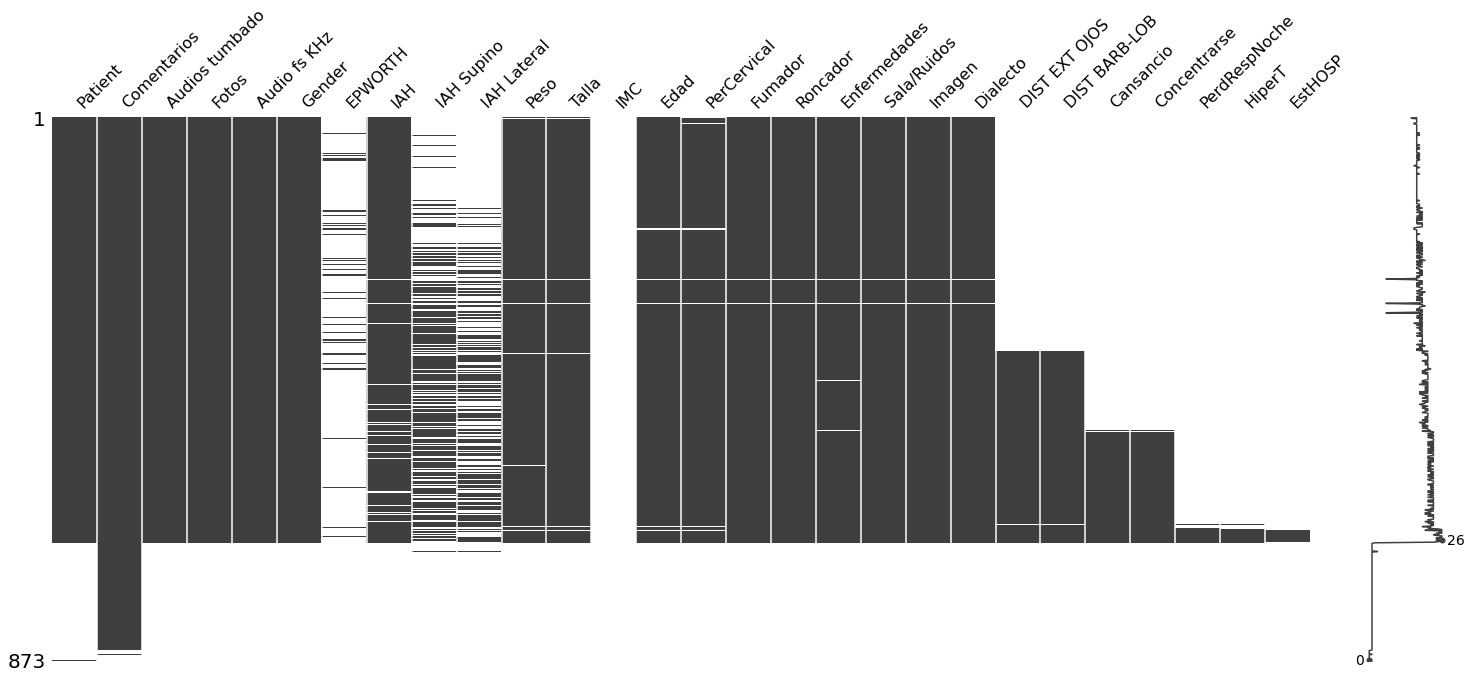

In [9]:
data = data.replace(-1.0,np.NaN)
msno.matrix(data)

<AxesSubplot:>

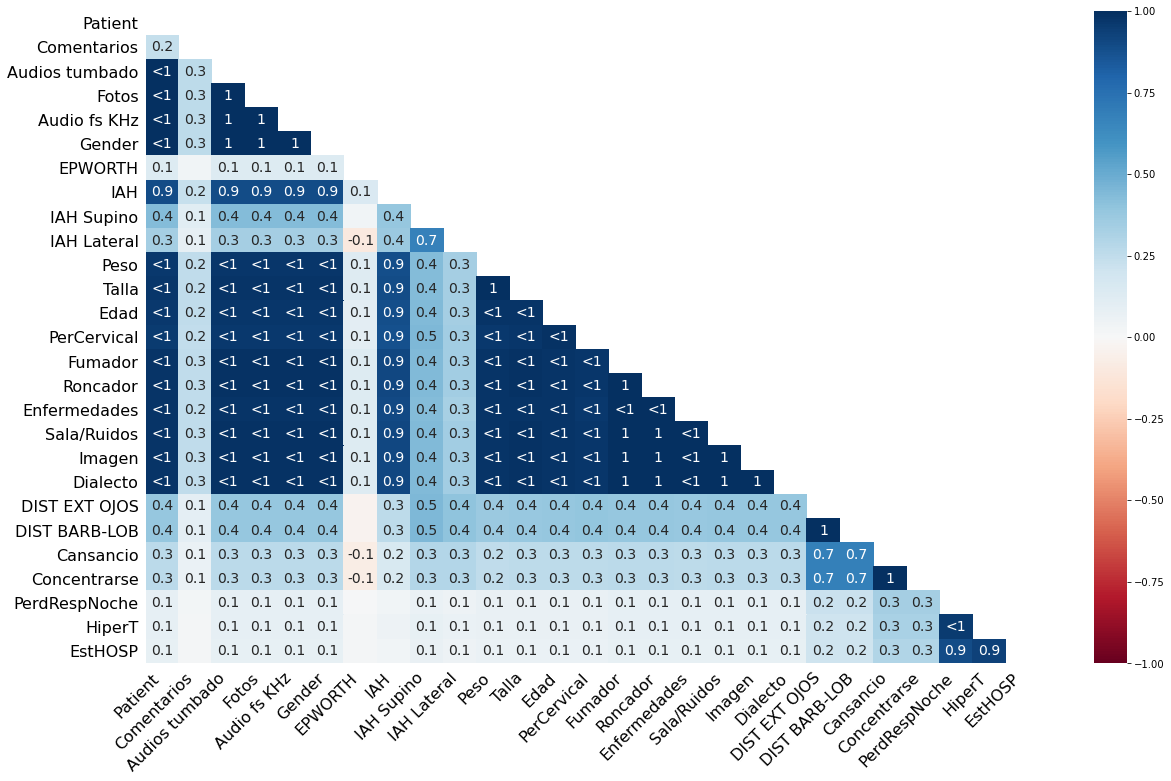

In [10]:
msno.heatmap(data)

### Data cleaning and Data preparation

We then select the variables of importance to the study by placing them in a new dataframe and renaming them.

In [11]:
OSA_df = data[['Patient','Gender','IAH','Peso','Talla','IMC','Edad','PerCervical', 'Fumador', 'Roncador', 'Enfermedades']]

In [12]:
OSA_df.columns = ['Patient','Gender','IAH','Weight','Height','BMI','Age','Cervical', 'Smoker', 'Snorer', 'Illness']

In [13]:
OSA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Patient   685 non-null    object 
 1   Gender    683 non-null    object 
 2   IAH       649 non-null    float64
 3   Weight    675 non-null    float64
 4   Height    676 non-null    float64
 5   BMI       0 non-null      float64
 6   Age       675 non-null    float64
 7   Cervical  671 non-null    float64
 8   Smoker    680 non-null    object 
 9   Snorer    680 non-null    object 
 10  Illness   678 non-null    object 
dtypes: float64(6), object(5)
memory usage: 75.1+ KB


In [14]:
OSA_df.isna().sum().sort_values()


Patient     188
Gender      190
Smoker      193
Snorer      193
Illness     195
Height      197
Weight      198
Age         198
Cervical    202
IAH         224
BMI         873
dtype: int64

In [15]:
OSA_df.dtypes

Patient      object
Gender       object
IAH         float64
Weight      float64
Height      float64
BMI         float64
Age         float64
Cervical    float64
Smoker       object
Snorer       object
Illness      object
dtype: object

Values that are NaN have to be replaced or deleted. 

An attempt has been made to see a possible relationship in some of these values to see if they could be replaced by useful values. However, no reliable method for estimating weight, height or age has been found. Cervical NaN has been replaced by the mean value for men as it has not been found to be a value that varies too much.

In [16]:
OSA_df_Hombres = OSA_df[OSA_df['Gender']=='hombre']
media = OSA_df_Hombres['Cervical'].mean()
for i in range(0, len(OSA_df['Cervical'])):
    if np.isnan(OSA_df['Cervical'][i]):
        OSA_df['Cervical'] = OSA_df['Cervical'].replace(OSA_df['Cervical'][i], media)

<ipython-input-16-973efb59f6d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OSA_df['Cervical'] = OSA_df['Cervical'].replace(OSA_df['Cervical'][i], media)


BMI is a variable closely linked to weight and height, so even if its value is NaN it can be calculated in a simple way.

In [17]:
OSA_df['BMI']=OSA_df['Weight']/(OSA_df['Height']/100)**2

<ipython-input-17-8ef8a4f9c3b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OSA_df['BMI']=OSA_df['Weight']/(OSA_df['Height']/100)**2


In [18]:
OSA_df.describe()

,IAH,Weight,Height,BMI,Age,Cervical
count,649.000000,675.000000,676.000000,675.000000,675.000000,873.000000
mean,20.364653,87.797037,171.399408,29.854170,49.503704,40.968487
std,18.692784,18.239146,9.603253,5.646257,12.433607,3.505397
min,0.000000,45.000000,144.000000,18.289895,19.000000,30.000000
25%,6.300000,75.000000,165.000000,26.038138,40.000000,39.000000
50%,14.200000,86.000000,171.000000,28.731747,49.000000,42.000000
75%,30.000000,98.000000,178.250000,32.671802,59.000000,42.133612
max,108.600000,165.000000,199.000000,63.654952,88.000000,53.000000


We have also chosen other variables of interest in addition to the main case study such as:
    illness, smoker and snorer.
    
To unify the criteria we will set all variations in these fields to Yes or No or to another option that may be of interest to us.

In [19]:
OSA_df['Illness']=OSA_df['Illness'].replace('ns', 'no')
OSA_df['Illness']=OSA_df['Illness'].replace('nd', 'no')
for i in range(0, len(OSA_df['Illness'])):
    if OSA_df['Illness'][i] != 'no':
        OSA_df['Illness'] = OSA_df['Illness'].replace(OSA_df['Illness'][i], 'si')

<ipython-input-19-8a733d0a2284>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OSA_df['Illness']=OSA_df['Illness'].replace('ns', 'no')
<ipython-input-19-8a733d0a2284>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OSA_df['Illness']=OSA_df['Illness'].replace('nd', 'no')
<ipython-input-19-8a733d0a2284>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [20]:
OSA_df['Smoker']=OSA_df['Smoker'].replace('si (poco)', 'si')
OSA_df['Smoker']=OSA_df['Smoker'].replace('poco', 'si')
OSA_df['Smoker']=OSA_df['Smoker'].replace('ns', np.nan)
OSA_df['Smoker']=OSA_df['Smoker'].replace('antiguo', 'old')

<ipython-input-20-37c91992fb2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OSA_df['Smoker']=OSA_df['Smoker'].replace('si (poco)', 'si')
<ipython-input-20-37c91992fb2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OSA_df['Smoker']=OSA_df['Smoker'].replace('poco', 'si')
<ipython-input-20-37c91992fb2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [21]:
OSA_df['Snorer']=OSA_df['Snorer'].replace('si´(protesis boca para dormir)', 'si')
OSA_df['Snorer']=OSA_df['Snorer'].replace('poco', 'si')
OSA_df['Snorer']=OSA_df['Snorer'].replace('ns', 'no')
OSA_df['Snorer']=OSA_df['Snorer'].replace('no con CPAD', 'CPAP')
OSA_df['Snorer']=OSA_df['Snorer'].replace('si sin CPAP', 'CPAP')


<ipython-input-21-e433e6ad5cfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OSA_df['Snorer']=OSA_df['Snorer'].replace('si´(protesis boca para dormir)', 'si')
<ipython-input-21-e433e6ad5cfb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OSA_df['Snorer']=OSA_df['Snorer'].replace('poco', 'si')
<ipython-input-21-e433e6ad5cfb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

### EDA BASIC

For the purpose of viewing the null variables and the null correlation between the different variables the following representations will be used:

- Matrix: null matrix is a dense display of data that allows you to quickly visually select patterns in the data completion.

- Heat map: Correlation heat map measures null correlation: how strongly the presence or absence of one variable affects the presence of another.

- Dendrogram: is a hierarchical clustering algorithm that gives us the correlation of variables with each other with respect to their nullity. When they are at the same level, it means that they are closely correlated.


###### source: https://github.com/ResidentMario/missingno

<AxesSubplot:>

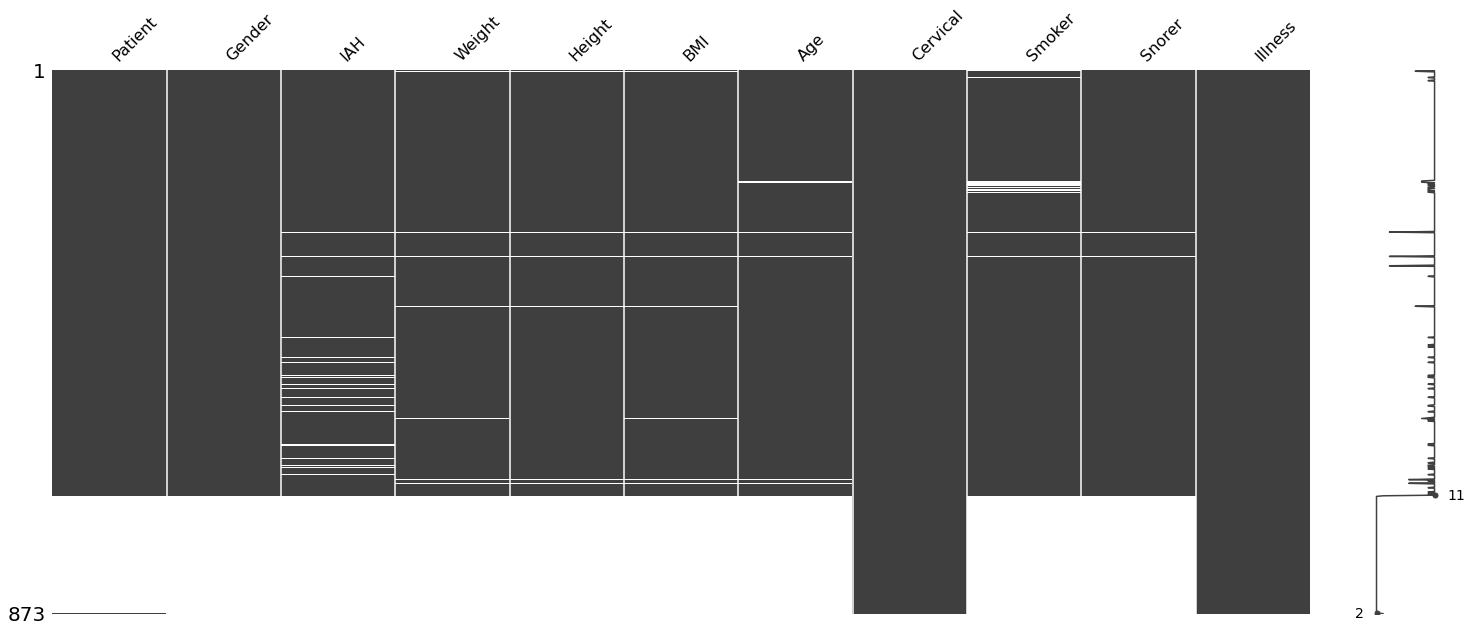

In [22]:
msno.matrix(OSA_df)

<AxesSubplot:>

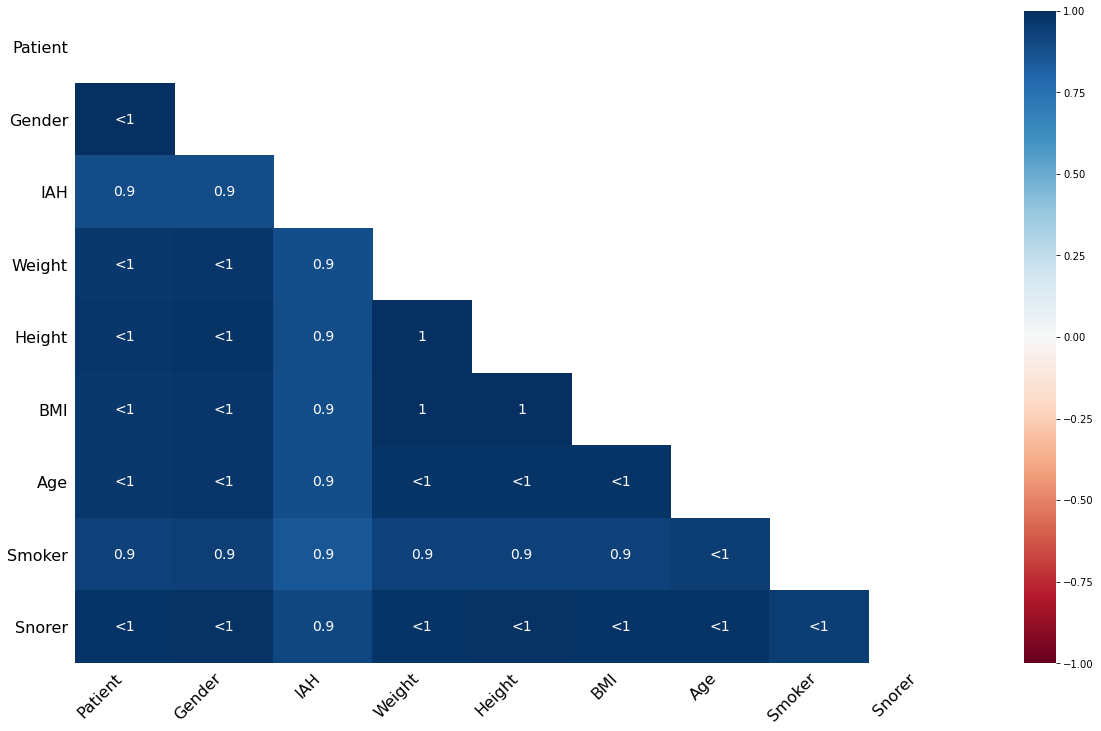

In [23]:
msno.heatmap(OSA_df)

<AxesSubplot:>

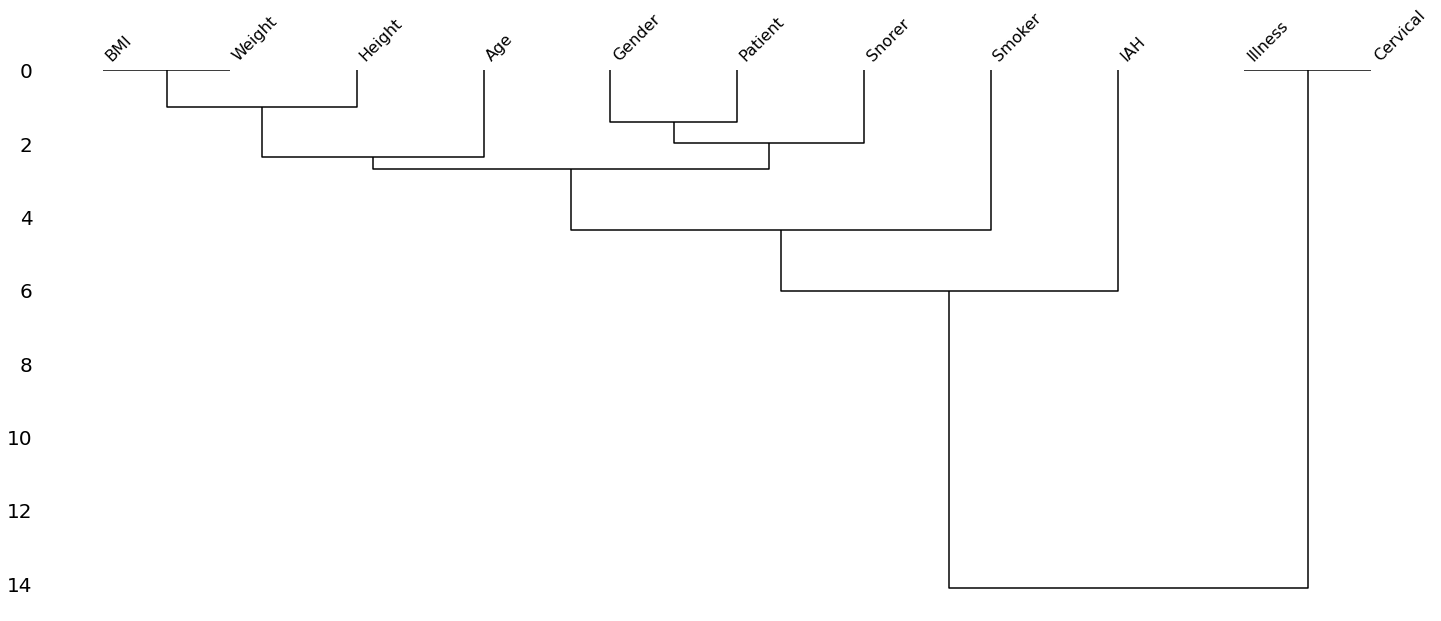

In [24]:
msno.dendrogram(OSA_df)

After this, we will replace all the NaN values that remain in our dataset as well as any possible duplicates. 

In [25]:
OSA_df.dropna(inplace=True)
OSA_df.drop_duplicates(inplace=True, ignore_index=True)

<ipython-input-25-04ff40f3a186>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OSA_df.dropna(inplace=True)
<ipython-input-25-04ff40f3a186>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OSA_df.drop_duplicates(inplace=True, ignore_index=True)


We will now check whether the correlation of the variables we have chosen is good by plotting this:

###### source: https://likegeeks.com/es/matrix-correlacion-python/

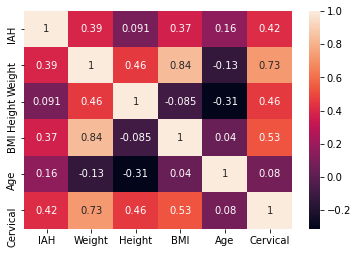

In [26]:
correlation_mat = OSA_df.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

Finally we paint the count of categorical variables to see their distribution.

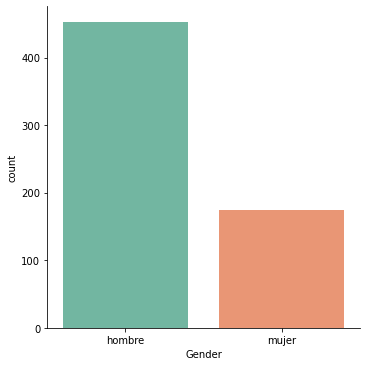

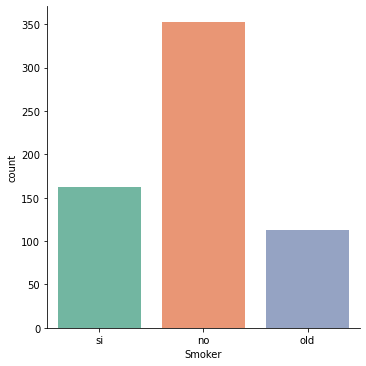

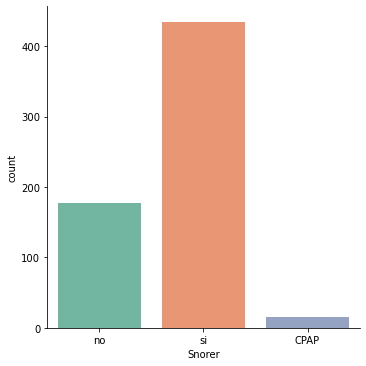

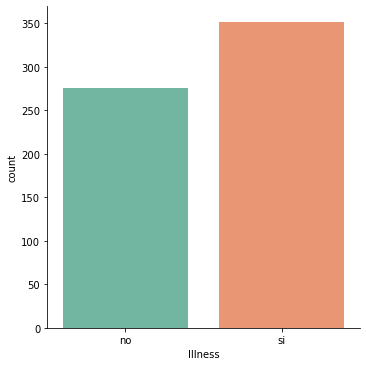

In [27]:
columnas_object = OSA_df.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop('Patient')
for col in columnas_object:
    fig = sns.catplot(x=col, kind="count", data=OSA_df, palette="Set2") 
plt.show()

We finish this process by exporting to excel the dataset that will serve as the basis for the regression and classification EDAs.

In [28]:
OSA_df.to_excel("../DATA/OSA_DF.xlsx", index=False,)